In [1]:
import pandas as pd

face_data = pd.read_csv('face.csv')

# Face
Denna analys berör datasetet som finns i biblioteket 'Fun.zip' i filen 'face.csv'. Vi kan börja med attt titta på lite basinformation om datasetet. Som exempelvis de första datapunkterna:

In [2]:
face_data.head()

,Unnamed: 0.1,x,y,color
0,1087,230.378162,141.270406,2
1,464,281.264318,127.419565,0
2,1237,157.530566,158.890252,3
3,68,107.354057,175.958260,0
4,1151,148.118641,161.809148,3


De sista datapunkterna:

In [3]:
face_data.tail()

,Unnamed: 0.1,x,y,color
1268,769,167.555193,70.606537,1
1269,965,195.410619,66.919043,1
1270,898,227.116212,96.825663,1
1271,335,204.010101,29.357968,0
1272,86,96.093497,171.561675,0


Och den allehanda summeringen av datasetets information:

In [4]:
face_data.describe()

,Unnamed: 0.1,x,y,color
count,1273.000000,1273.000000,1273.000000,1273.000000
mean,636.000000,183.323909,117.068835,0.747054
std,367.627756,57.234706,57.518379,1.006485
min,0.000000,81.135373,4.943902,0.000000
25%,318.000000,143.092947,72.213496,0.000000
50%,636.000000,177.060595,108.399710,0.000000
75%,954.000000,226.692160,160.324629,1.000000
max,1272.000000,304.175420,241.815846,3.000000


Vi kan se att det finns en attribut 'color' som vi kan titta närmre på:

In [17]:
face_data.value_counts('color')

color
0    708
1    317
3    138
2    110
Name: count, dtype: int64

Vi kan se att det finns fyra färger: 0, 1, 2, 3. Vi kan undersöka om dessa beskriver kluster för attributen x, y genom att genomföra k-means och jämföra resultaten:

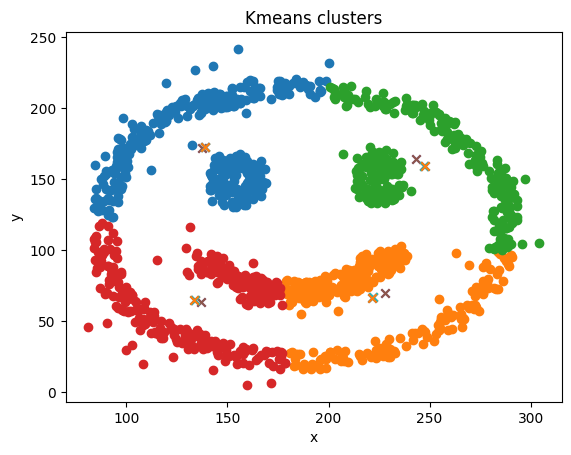

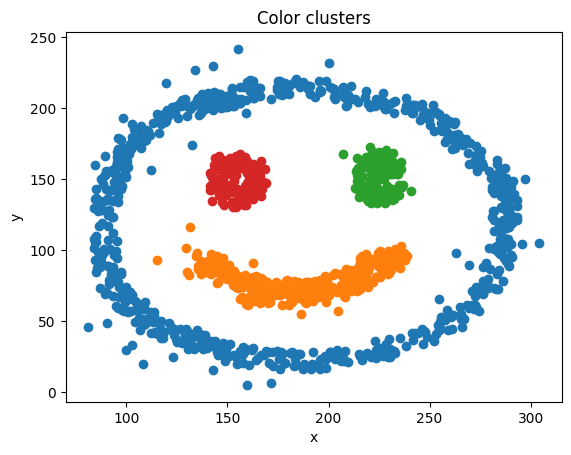

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

from numpy._typing import ArrayLike


def cluster_2d(df: pd.DataFrame, col1: str, col2: str, k: int) -> None:
    subset = pd.DataFrame(pd.concat([df[col1], df[col2]], axis=1))
    clusters = KMeans(n_clusters = k, random_state = 309).fit_predict(subset)
    plot_2d_clusters(df, col1, col2, k, clusters)


def plot_2d_clusters(df: pd.DataFrame, x: str, y: str, k: int, cluster_array: ArrayLike) -> None:
    for cluster in range(k):
        plt.scatter(df.loc[cluster_array == cluster, x],
                    df.loc[cluster_array == cluster, y])
    plt.xlabel(x)
    plt.ylabel(y)


def fake_centroid():
    subset = pd.DataFrame(pd.concat([face_data['x'], face_data['y']], axis=1))
    kmean = KMeans(n_clusters=4, random_state=random.randint(1,500)).fit(subset)
    centroids = kmean.cluster_centers_
    plt.scatter(centroids[:,0], centroids[:,1], marker='x')

    
cluster_2d(face_data, 'x', 'y', 4)
plt.title('Kmeans clusters')
fake_centroid()
fake_centroid()
fake_centroid()
fake_centroid()
fake_centroid()
fake_centroid()
fake_centroid()
fake_centroid()
plt.show()
plot_2d_clusters(face_data, 'x', 'y', 4, face_data['color'])
plt.title('Color clusters')
plt.show()    

Vi kan se att color inte har med någon sorts kmeans klustring att göra, utan är snarare ett roligt sätt att måla ett ansikte. X och Y ger alltså koordenaterna för att rita ansiktet medan color målar olika delar av ansiktet.

Frågan återstår då vad attributet "unnamed 0.1" innebär. Vi kan göra ett historgram för att få en överblick av alla data:

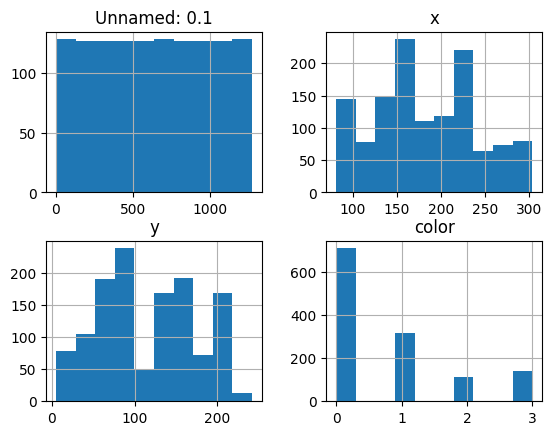

In [7]:
face_data.hist()
plt.show()

Histogramet gör oss inte mycket klokare, utan visar bara att "Unnamed: 0.1" har en uniform distribution. Vi kan undersöka vad som händer om vi plottar attributen mot x eller y:

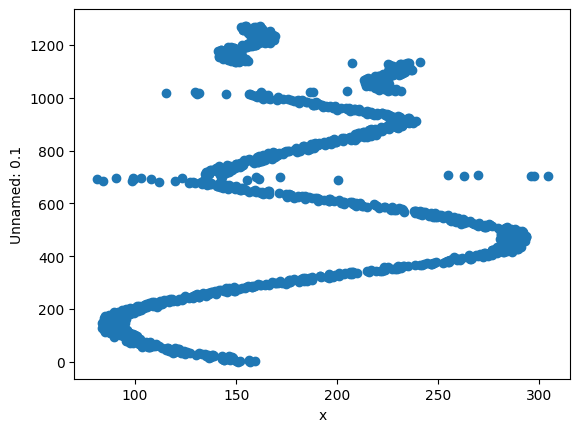

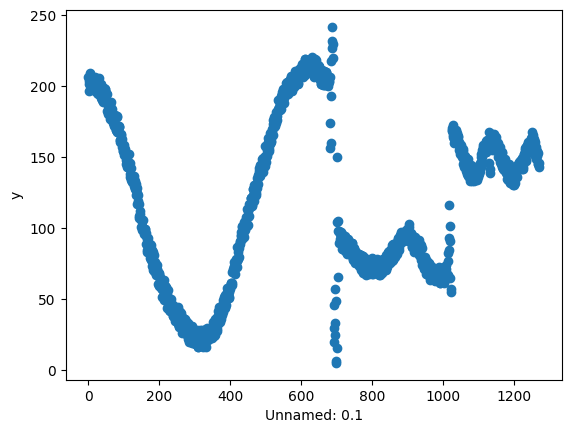

In [8]:
def scatter_2d(df: pd.DataFrame, x: str, y: str) -> None:
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

scatter_2d(face_data, 'x', 'Unnamed: 0.1')
scatter_2d(face_data, 'Unnamed: 0.1', 'y')

Spännande former, men fortfarande ingen användbar information. Vad händer om vi kombinerar x, y, och Unnamed: 0.1 i 3D?

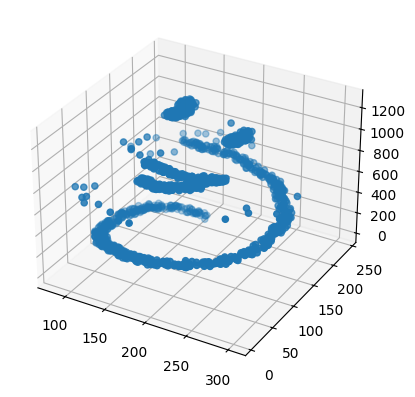

In [9]:
def invert_1d_array(array: ArrayLike) -> list:
    new_array = []
    for value in array:
        new_array.append(-value)
    return new_array

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter((face_data['x']), face_data['y'], (face_data['Unnamed: 0.1']))
plt.show()

Det verkar som att Unnamed: 0.1 gör att vårt ansikte ritas som en spiral i tre dimensioner.

## Summering
Datasetet face beskriver, som namnet antyder, punkter för att rita upp en ansikte. Ansiktet kan avbildas i två eller tre dimensioner, där en spiral läggs till, och färgas med ett fjärde attribut.

In [ ]:
sorted(list(face_data['Unnamed: 0.1']))